# Data Colletion

In [ ]:
import pandas as pd

url = "https://docs.google.com/spreadsheets/d/1_U2eg12_fTeJKefT2EkmBR6QpOcLKfLHoEzqZ74x4pM/gviz/tq?tqx=out:csv&sheet=main"

df = pd.read_csv(url)
df = df[['comment', 'label_emotion']]

df[['comment', 'label_emotion']].head()
len(df[['comment','label_emotion']])

500

# Preprocessing



In [ ]:
!pip install emoji
# !pip install googletrans==4.0.0-rc1
!pip install Sastrawi
# from googletrans import Translator
import emoji
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from google.colab import files

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.6 MB/s eta 0:00:00


In [ ]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www.\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = emoji.replace_emoji(text, replace='')
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)
    text = re.sub(r"[^\w\s!?]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

def clean_for_bert(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\.\S+", " ", text)
    text = re.sub(r"<.*?>", " ", text)
    text = re.sub(r"@\w+", " ", text)
    text = emoji.replace_emoji(text, replace=' ')
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [ ]:
url_dict = "https://docs.google.com/spreadsheets/d/1_U2eg12_fTeJKefT2EkmBR6QpOcLKfLHoEzqZ74x4pM/gviz/tq?tqx=out:csv&sheet=dictionary"
df_dict = pd.read_csv(url_dict)
slang_dict = dict(zip(df_dict['gaul'], df_dict['normal']))

def replace_slang(text, slang_dict):
    words = text.split()
    replaced_words = [slang_dict.get(word, word) for word in words]
    return ' '.join(replaced_words)

In [ ]:
# translator = Translator()

# def translate_to_english(text):
#     if not isinstance(text, str) or text.strip() == '':
#         return ''
#     try:
#         translation = translator.translate(text, src='id', dest='en')
#         return translation.text
#     except Exception as e:
#         print(f"Error translating: {text} | {e}")
#         return text

# df['translated_comment'] = df['normalized_comment'].apply(translate_to_english)
# df['translated_comment']

In [ ]:
def remove_stopwords(text):
    stopwords = set(StopWordRemoverFactory().get_stop_words())
    return ' '.join([w for w in text.split() if w not in stopwords])

def stem_text(text):
    stemmer = StemmerFactory().create_stemmer()
    return stemmer.stem(text)

In [ ]:
df = df.drop_duplicates(subset=['comment', 'label_emotion'])
df = df.dropna(subset=['comment', 'label_emotion']).reset_index(drop=True)
# df['comment'] = df['comment'].astype(str)
df['cleaned'] = df['comment'].apply(clean_text)
df['normalized'] = df['cleaned'].apply(lambda x: replace_slang(x, slang_dict))
df['rf_input'] = df['normalized'].apply(remove_stopwords).apply(stem_text)
# df['bert_input'] = df['normalized']
df['bert_input'] = df['comment'].apply(clean_for_bert)
y = df['label_emotion']
df[['comment', 'label_emotion', 'rf_input', 'bert_input', 'cleaned', 'normalized']]

,comment,label_emotion,rf_input,bert_input,cleaned,normalized
0,"heyy suara minji cakep banget, bahkan suara as...",1,heyy suara minji cakep sangat bahkan suara asl...,"heyy suara minji cakep banget, bahkan suara as...",heyy suara minji cakep banget bahkan suara asl...,heyy suara minji cakep sangat bahkan suara asl...
1,iihh sedih banget sama tingkah laku member new...,2,iihh sedih sangat sama tingkah laku member new...,iihh sedih banget sama tingkah laku member new...,iihh sedih banget sama tingkah laku member new...,iihh sedih sangat sama tingkah laku member new...
2,"kangen new jeans, sekarang liat mereka bawaany...",2,kangen new jeans sekarang liat bawaanya hilang...,"kangen new jeans, sekarang liat mereka bawaany...",kangen new jeans sekarang liat mereka bawaanya...,kangen new jeans sekarang liat mereka bawaanya...
3,"pernah sesuka itu sama nj, lagunya selalu cepe...",2,pernah suka sama nj lagu selalu cepet nempel k...,"pernah sesuka itu sama nj, lagunya selalu cepe...",pernah sesuka itu sama nj lagunya selalu cepet...,pernah sesuka itu sama nj lagunya selalu cepet...
4,Sayang banget group sebagus ini mnjadi najiez🫤,5,sayang sangat group bagus mnjadi najis,sayang banget group sebagus ini mnjadi najiez,sayang banget group sebagus ini mnjadi najiez,sayang sangat group sebagus ini mnjadi najis
...,...,...,...,...,...,...
491,"Suara beatnya bikin jantung deg-degan, berasa ...",3,suara beatnya bikin jantung degdegan asa horro...,"suara beatnya bikin jantung deg-degan, berasa ...",suara beatnya bikin jantung degdegan berasa di...,suara beatnya bikin jantung degdegan berasa di...
492,"Efek cerminnya serem banget, berasa ada yang n...",3,efek cermin rem sangat asa ngawasin,"efek cerminnya serem banget, berasa ada yang n...",efek cerminnya serem banget berasa ada yang ng...,efek cerminnya serem sangat berasa ada yang ng...
493,"Ngeri banget pas bagian spider efeknya, aku la...",3,ngeri sangat pas bagi spider efek aku langsung...,"ngeri banget pas bagian spider efeknya, aku la...",ngeri banget pas bagian spider efeknya aku lan...,ngeri sangat pas bagian spider efeknya aku lan...
494,"Keren sih, tapi auranya DARKK banget sampe mer...",3,keren sih aura darkk sangat sampe merinding ba...,"keren sih, tapi auranya darkk banget sampe mer...",keren sih tapi auranya darkk banget sampe meri...,keren sih tetapi auranya darkk sangat sampe me...


In [ ]:
print(df[['cleaned']].to_string(index=False))

                                                                                                                                                                                                                       cleaned
                                                                                                                                                         heyy suara minji cakep banget bahkan suara asli mereka lebih bagus ya
                                                                                                                                                                  iihh sedih banget sama tingkah laku member newjeans sekarang
                                                                                                                                                               kangen new jeans sekarang liat mereka bawaanya ilfeel kenapa ya
                                                                                                            


 top 10: happiness
sangat: 40 kali
keren: 28 kali
aku: 22 kali
lagu: 18 kali
carmen: 17 kali
bangga: 16 kali
sama: 13 kali
nya: 12 kali
debut: 12 kali
suara: 9 kali


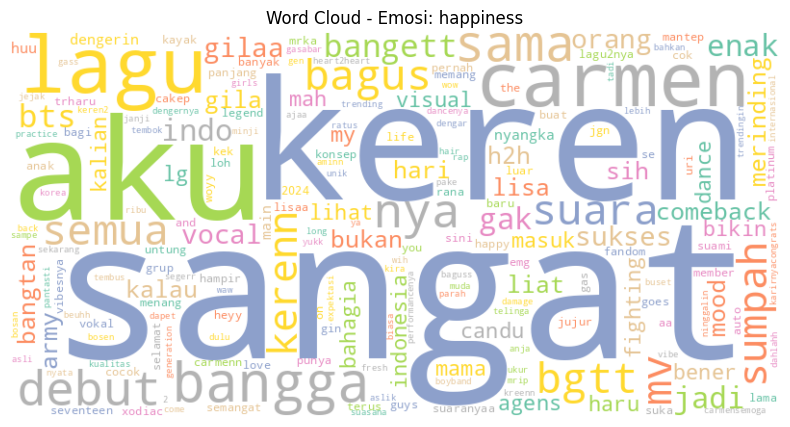


 top 10: sadness
sangat: 33 kali
aku: 33 kali
menang: 24 kali
lagu: 22 kali
kangen: 15 kali
sama: 13 kali
sedih: 12 kali
jonghyun: 12 kali
liat: 10 kali
jadi: 10 kali


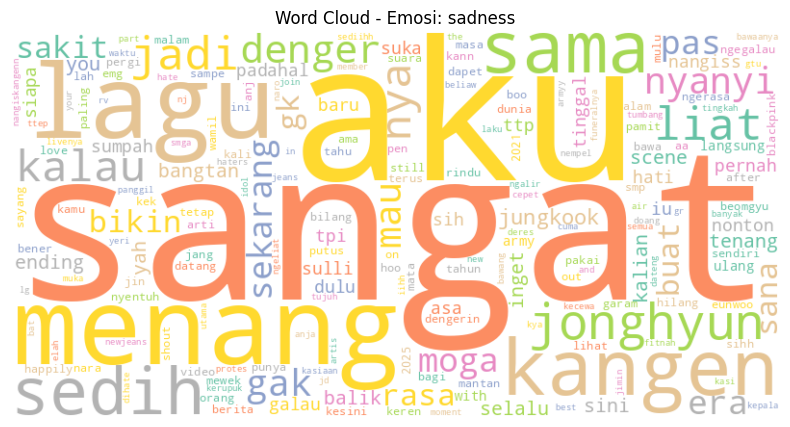


 top 10: anger
kamu: 23 kali
sangat: 21 kali
aku: 21 kali
gak: 18 kali
nya: 14 kali
sih: 13 kali
orang: 13 kali
sama: 12 kali
kalau: 10 kali
idol: 8 kali


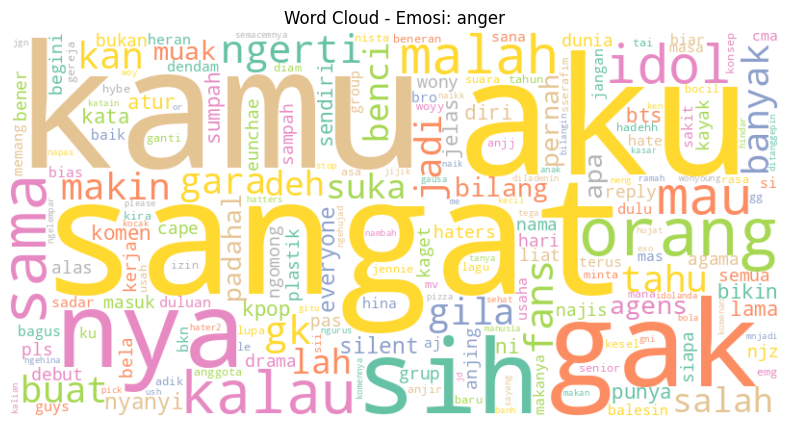


 top 10: love
sangat: 36 kali
lagu: 26 kali
sama: 24 kali
aku: 17 kali
carmen: 12 kali
nya: 10 kali
suka: 8 kali
semua: 8 kali
enak: 7 kali
candu: 7 kali


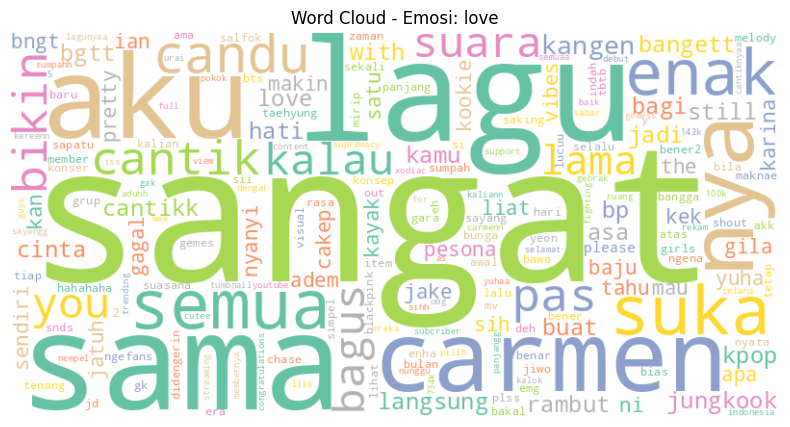


 top 10: fear
aku: 45 kali
sangat: 31 kali
takut: 29 kali
sama: 20 kali
rem: 15 kali
sih: 11 kali
kalau: 11 kali
mv: 11 kali
fandom: 10 kali
gila: 10 kali


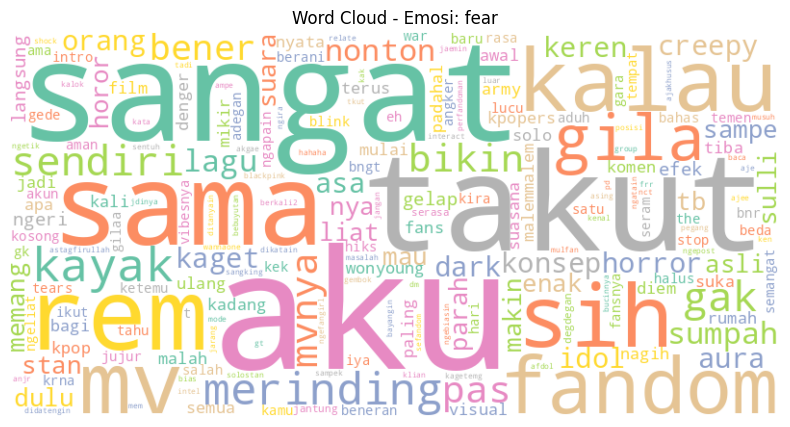

In [ ]:
label_map = {
    1: 'happiness',
    2: 'sadness',
    3: 'fear',
    4: 'love',
    5: 'anger'
}

unique_emotions = df['label_emotion'].unique()

for label in unique_emotions:
    text = ' '.join(df[df['label_emotion'] == label]['rf_input'])

    words = text.split()

    word_freq = Counter(words)

    print(f"\n top 10: {label_map[label]}")
    for word, freq in word_freq.most_common(10):
        print(f"{word}: {freq} kali")

    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Set2')
    wordcloud.generate_from_frequencies(word_freq)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud - Emosi: {label_map[label]}")
    plt.show()

# Modeling

In [ ]:
!pip install -U memory_profiler
import pandas as pd
from datasets import Dataset
import numpy as np
import re
import emoji
import torch
import warnings
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from memory_profiler import memory_usage
from transformers import BertTokenizer, TFBertForSequenceClassification, BertModel, AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression


In [ ]:
def run_with_memory_tracking(func, *args, **kwargs):
    mem_usage, result = memory_usage((func, args, kwargs), retval=True, max_usage=True)
    return result, mem_usage


def print_result(name, y_true, y_pred, train_time, predict_time, mem_used):
    print(f"\n{name}")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Train time: {train_time:.2f}s, Predict time: {predict_time:.3f}s, Memory: {mem_used:.2f} MiB")
    print(classification_report(y_true, y_pred))


Random Forest + TF-IDF
Accuracy: 0.5900
Train time: 0.67s, Predict time: 0.046s, Memory: 1612.79 MiB
              precision    recall  f1-score   support

           1       0.64      0.35      0.45        20
           2       0.69      0.45      0.55        20
           3       1.00      0.60      0.75        20
           4       0.55      0.60      0.57        20
           5       0.45      0.95      0.61        20

    accuracy                           0.59       100
   macro avg       0.67      0.59      0.59       100
weighted avg       0.67      0.59      0.59       100



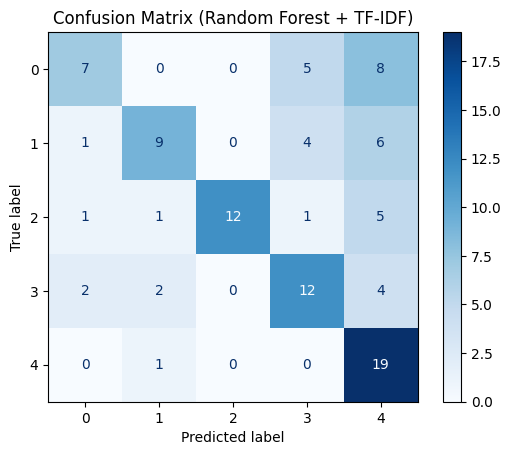

In [ ]:
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

SEED = 42

X_text = df['rf_input'].astype(str).tolist()
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y, test_size=0.2, random_state=SEED, stratify=y
)

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf = tfidf.transform(X_test_text)

def train_rf():
    model = RandomForestClassifier(random_state=SEED)
    model.fit(X_train_tfidf, y_train)
    return model

start_train = time.time()
rf_model, rf_mem = run_with_memory_tracking(train_rf)
train_time = time.time() - start_train

start_pred = time.time()
X_test_tfidf_for_pred = tfidf.transform(X_test_text)
rf_pred = rf_model.predict(X_test_tfidf_for_pred)
predict_time = time.time() - start_pred

print_result("Random Forest + TF-IDF", y_test, rf_pred, train_time, predict_time, rf_mem)

cm = confusion_matrix(y_test, rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Random Forest + TF-IDF)")
plt.show()


In [ ]:
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, f1_score
import matplotlib.pyplot as plt

SEED = 42

X_text = df['rf_input'].astype(str).tolist()
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y, test_size=0.2, random_state=SEED, stratify=y
)

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf = tfidf.transform(X_test_text)

def train_lr():
    model = LogisticRegression(solver='lbfgs', max_iter=2000, random_state=SEED)
    model.fit(X_train_tfidf, y_train)
    return model

start_train = time.time()
res = run_with_memory_tracking(train_lr)

if isinstance(res, tuple) and len(res) == 3:
    lr_model, lr_train_time, lr_mem_mb = res
elif isinstance(res, tuple) and len(res) == 2:
    lr_model, lr_mem_mb = res
    lr_train_time = time.time() - start_train
else:
    lr_model = res
    lr_train_time = time.time() - start_train
    lr_mem_mb = None

start_pred = time.time()
X_test_tfidf_for_pred = tfidf.transform(X_test_text)
lr_pred = lr_model.predict(X_test_tfidf_for_pred)
predict_time = time.time() - start_pred

n = len(X_test_text)
per_sample_ms = (predict_time / n) * 1000
throughput = n / predict_time if predict_time > 0 else float('inf')

try:
    print_result("Logistic Regression + TF-IDF (end-to-end)", y_test, lr_pred, lr_train_time, predict_time, lr_mem_mb)
except NameError:
    print("Accuracy:", accuracy_score(y_test, lr_pred))
    print("F1 macro:", f1_score(y_test, lr_pred, average='macro'))
    print(classification_report(y_test, lr_pred))

print(f"End-to-end predict time (transform + predict): {predict_time:.4f} s")
print(f"Per-sample: {per_sample_ms:.4f} ms")
print(f"Throughput: {throughput:.2f} samples/s")

cm = confusion_matrix(y_test, lr_pred)
disp



Logistic Regression + TF-IDF (end-to-end)
Accuracy: 0.6300
Train time: 0.42s, Predict time: 0.011s, Memory: 1618.16 MiB
              precision    recall  f1-score   support

           1       0.75      0.45      0.56        20
           2       0.55      0.60      0.57        20
           3       0.93      0.65      0.76        20
           4       0.55      0.55      0.55        20
           5       0.56      0.90      0.69        20

    accuracy                           0.63       100
   macro avg       0.67      0.63      0.63       100
weighted avg       0.67      0.63      0.63       100

End-to-end predict time (transform + predict): 0.0114 s
Per-sample: 0.1139 ms
Throughput: 8776.71 samples/s



SVM (Linear) + TF-IDF (end-to-end)
Training time: 0.2790 seconds
Memory used during training: 1618.34 MB
End-to-end predict time (transform + predict): 0.0034 seconds
Per-sample: 0.0342 ms
Throughput: 29263.27 samples/s
Accuracy: 0.6700
              precision    recall  f1-score   support

           1     0.9091    0.5000    0.6452        20
           2     0.5714    0.6000    0.5854        20
           3     1.0000    0.7000    0.8235        20
           4     0.6000    0.6000    0.6000        20
           5     0.5588    0.9500    0.7037        20

    accuracy                         0.6700       100
   macro avg     0.7279    0.6700    0.6716       100
weighted avg     0.7279    0.6700    0.6716       100



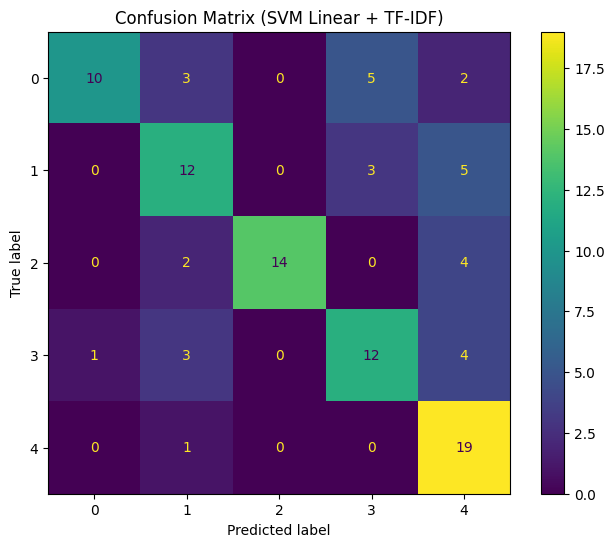

In [ ]:
import time
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, f1_score
import matplotlib.pyplot as plt

SEED = 42

X_text = df['rf_input'].astype(str).tolist()
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y, test_size=0.2, random_state=SEED, stratify=y
)

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf = tfidf.transform(X_test_text)

def train_svm():
    model = LinearSVC(random_state=SEED)
    model.fit(X_train_tfidf, y_train)
    return model

start_train = time.time()
res = run_with_memory_tracking(train_svm)
train_time = time.time() - start_train

if isinstance(res, tuple) and len(res) == 3:
    svm_model, train_time, mem_used = res
elif isinstance(res, tuple) and len(res) == 2:
    svm_model, mem_used = res
else:
    svm_model = res
    mem_used = None

start_pred = time.time()
X_test_tfidf_for_pred = tfidf.transform(X_test_text)
svm_pred = svm_model.predict(X_test_tfidf_for_pred)
predict_time = time.time() - start_pred

n = len(X_test_text)
per_sample_ms = (predict_time / n) * 1000
throughput = n / predict_time if predict_time > 0 else float('inf')

print("\nSVM (Linear) + TF-IDF (end-to-end)")
print(f"Training time: {train_time:.4f} seconds")
if mem_used is not None:
    print(f"Memory used during training: {mem_used:.2f} MB")
print(f"End-to-end predict time (transform + predict): {predict_time:.4f} seconds")
print(f"Per-sample: {per_sample_ms:.4f} ms")
print(f"Throughput: {throughput:.2f} samples/s")
print(f"Accuracy: {accuracy_score(y_test, svm_pred):.4f}")
print(classification_report(y_test, svm_pred, digits=4))

cm = confusion_matrix(y_test, svm_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax, values_format='d')
plt.title("Confusion Matrix (SVM Linear + TF-IDF)")
plt.show()


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:07:37] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost + TF-IDF
Train time: 0.6383s
Predict time: 0.0026s
Peak memory (reported): 1648.09 MB
Accuracy: 0.56

Classification report:
              precision    recall  f1-score   support

           0       0.64      0.45      0.53        20
           1       0.55      0.55      0.55        20
           2       0.78      0.70      0.74        20
           3       0.64      0.35      0.45        20
           4       0.41      0.75      0.53        20

    accuracy                           0.56       100
   macro avg       0.60      0.56      0.56       100
weighted avg       0.60      0.56      0.56       100



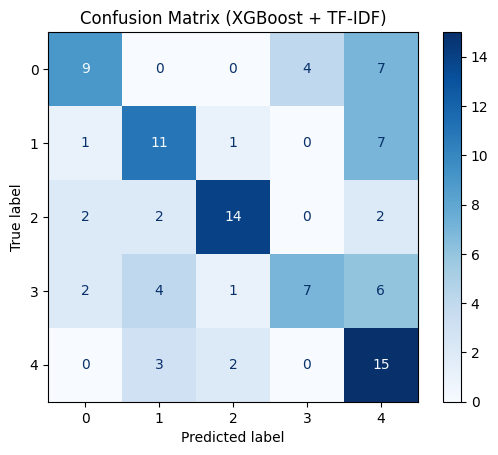

XGBoost + TF-IDF (end-to-end)
End-to-end predict time (transform + predict): 0.0055 s
Samples measured: 100
Per-sample: 0.0555 ms
Throughput: 18021.41 samples/s


In [ ]:
import time
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

if 'df' not in globals() or 'rf_input' not in df.columns:
    raise ValueError("Data not found: make sure `df['rf_input']` exists.")
if 'y' not in globals():
    raise ValueError("Label vector `y` not found. Define `y` (pd.Series or array-like).")

try:
    from xgboost import XGBClassifier
except Exception as e:
    raise ImportError("XGBoost not installed. Run `pip install xgboost` then re-run.") from e

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['rf_input'].astype(str))

le = LabelEncoder()
y_enc = le.fit_transform(np.array(y).ravel())

unique, counts = np.unique(y_enc, return_counts=True)
strat = y_enc if counts.min() >= 2 else None
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y_enc, test_size=0.2, random_state=42, stratify=strat
)

def _call_run_with_memory_tracking(func):
    start_train = time.time()
    if 'run_with_memory_tracking' in globals():
        res = run_with_memory_tracking(func)
        if isinstance(res, tuple) and len(res) == 3:
            model, train_time, mem = res
        elif isinstance(res, tuple) and len(res) == 2:
            model, mem = res
            train_time = time.time() - start_train
        else:
            model, train_time, mem = res, time.time() - start_train, None
    else:
        model = func()
        train_time = time.time() - start_train
        mem = None
    return model, train_time, mem

def train_xgb():
    model = XGBClassifier(
        use_label_encoder=False,
        eval_metric='mlogloss',
        n_jobs=-1,
        random_state=42
    )
    model.fit(X_train, y_train)
    return model

xgb_model, xgb_train_time, xgb_mem = _call_run_with_memory_tracking(train_xgb)

start_pred = time.time()
y_pred = xgb_model.predict(X_test)
predict_time = time.time() - start_pred

print("XGBoost + TF-IDF")
print(f"Train time: {xgb_train_time:.4f}s")
print(f"Predict time: {predict_time:.4f}s")
if xgb_mem is not None:
    print(f"Peak memory (reported): {xgb_mem:.2f} MB")

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:")
print(classification_report(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (XGBoost + TF-IDF)")
plt.show()

idx = np.arange(len(df))
_, test_idx = train_test_split(idx, test_size=0.2, random_state=42, stratify=(y_enc if 'y_enc' in globals() else None))
X_test_text = df['rf_input'].astype(str).iloc[test_idx].tolist()

t0 = time.time()
X_test_tfidf_for_pred = tfidf.transform(X_test_text)
y_pred_e2e = xgb_model.predict(X_test_tfidf_for_pred)
predict_time_e2e = time.time() - t0

n = len(X_test_text)
per_sample_ms = (predict_time_e2e / n) * 1000
throughput = n / predict_time_e2e if predict_time_e2e > 0 else float('inf')

print("XGBoost + TF-IDF (end-to-end)")
print(f"End-to-end predict time (transform + predict): {predict_time_e2e:.4f} s")
print(f"Samples measured: {n}")
print(f"Per-sample: {per_sample_ms:.4f} ms")
print(f"Throughput: {throughput:.2f} samples/s")


TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


tf_model.h5:   0%|          | 0.00/1.47G [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-large-p2 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
50/50 [==============================] - 148s 596ms/step - loss: 1.4045 - sparse_categorical_accuracy: 0.4343 - val_loss: 1.0269 - val_sparse_categorical_accuracy: 0.7100
Epoch 2/5
50/50 [==============================] - 21s 427ms/step - loss: 0.6293 - sparse_categorical_accuracy: 0.8460 - val_loss: 0.6931 - val_sparse_categorical_accuracy: 0.7400
Epoch 3/5
50/50 [==============================] - 19s 388ms/step - loss: 0.2149 - sparse_categorical_accuracy: 0.9495 - val_loss: 0.7459 - val_sparse_categorical_accuracy: 0.7600
Epoch 4/5
50/50 [==============================] - 19s 381ms/step - loss: 0.0661 - sparse_categorical_accuracy: 0.9899 - val_loss: 0.7490 - val_sparse_categorical_accuracy: 0.7600
Epoch 5/5
50/50 [==============================] - 19s 378ms/step - loss: 0.0380 - sparse_categorical_accuracy: 0.9949 - val_loss: 0.7859 - val_sparse_categorical_accuracy: 0.7900

BERT Classification
Accuracy: 0.7900
Train time: 335.95s, Predict time: 1.218s, Memory: 5868.97 Mi

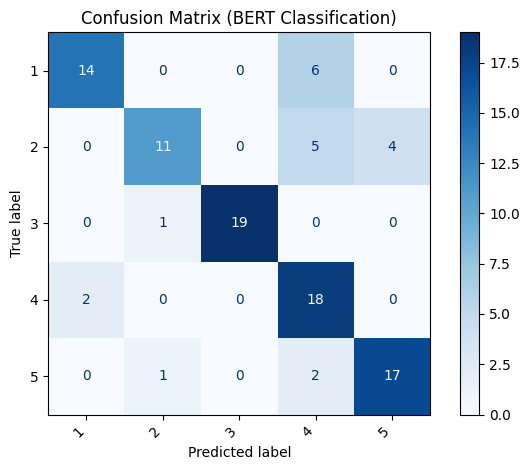

In [ ]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

le = LabelEncoder()
y_encoded = le.fit_transform(df['label_emotion'])

X_train_text, X_test_text, y_train, y_test = train_test_split(
    df['bert_input'], y_encoded, test_size=0.2, random_state=SEED, stratify=y_encoded
)

tokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-large-p2")
train_encodings = tokenizer(list(X_train_text), truncation=True, padding=True, max_length=128, return_tensors='tf')
test_encodings = tokenizer(list(X_test_text), truncation=True, padding=True, max_length=128, return_tensors='tf')

y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_train)).shuffle(100).batch(8)
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), y_test)).batch(8)

def train_bert():
    model = TFBertForSequenceClassification.from_pretrained("indobenchmark/indobert-large-p2", num_labels=len(le.classes_))
    optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    metric = tf.keras.metrics.SparseCategoricalAccuracy()
    model.compile(optimizer=optimizer, loss=loss, metrics=[metric])
    model.fit(train_dataset, validation_data=test_dataset, epochs=5, verbose=1)
    return model

start_train = time.time()
bert_model, bert_mem = run_with_memory_tracking(train_bert)
train_time = time.time() - start_train

_ = bert_model.predict(test_dataset.take(1), verbose=0)

t_pred = time.time()
pred_logits = bert_model.predict(test_dataset, verbose=0)
predict_time = time.time() - t_pred

if hasattr(pred_logits, "logits"):
    logits = pred_logits.logits
else:
    logits = pred_logits

pred_bert = tf.argmax(logits, axis=1).numpy()

print_result("BERT Classification", y_test.numpy(), pred_bert, train_time, predict_time, bert_mem)

y_true = y_test.numpy()
y_pred = pred_bert
labels = list(le.classes_)

cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (BERT Classification)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import os, time, random, json, re
import numpy as np
import torch
from tqdm import tqdm
from transformers import AutoTokenizer, AutoModel
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from joblib import dump
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from scipy.sparse import hstack
from collections import Counter

SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)
TEXT_COL = "bert_input"
LABEL_COL = "label_emotion"
BERT_MODEL = "indobenchmark/indobert-large-p2"
MAX_LEN = 128
BERT_BATCH = 32
TFIDF_MAX_FEATURES = 7000
SVD_DIM = 256
CV_FOLDS = 5
OUTDIR = "./hybrid_absolute_best_v3"
os.makedirs(OUTDIR, exist_ok=True)

emoji_pattern = re.compile("[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF]+", flags=re.UNICODE)

def text_features(texts):
    feats = []
    for t in texts:
        t = str(t)
        ln = len(t)
        uppercase_ratio = (sum(1 for c in t if c.isupper()) / ln) if ln > 0 else 0.0
        punct_count = sum(1 for c in t if c in "!?.,;:")
        emoji_count = len(emoji_pattern.findall(t))
        avg_word_len = np.mean([len(w) for w in t.split()]) if t.split() else 0.0
        feats.append([ln, uppercase_ratio, punct_count, emoji_count, avg_word_len])
    return np.array(feats, dtype=np.float32)

df = df.copy()
df[TEXT_COL] = df[TEXT_COL].astype(str)
df[LABEL_COL] = df[LABEL_COL].astype(str)

le = LabelEncoder()
y_all = le.fit_transform(df[LABEL_COL])
X_all_text = df[TEXT_COL].tolist()

X_train_text, X_test_text, y_train, y_test = train_test_split(X_all_text, y_all, test_size=0.2, random_state=SEED, stratify=y_all)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = AutoTokenizer.from_pretrained(BERT_MODEL)
bert_model = AutoModel.from_pretrained(BERT_MODEL, output_hidden_states=True).to(device)
bert_model.eval()

def extract_bert_embeddings(texts, batch_size=BERT_BATCH, max_len=MAX_LEN, pooling="cls_mean"):
    all_embs = []
    for i in tqdm(range(0, len(texts), batch_size), desc="BERT batches"):
        batch = texts[i:i+batch_size]
        enc = tokenizer(batch, return_tensors="pt", padding=True, truncation=True, max_length=max_len)
        enc = {k: v.to(device) for k, v in enc.items()}
        with torch.no_grad():
            out = bert_model(**enc)
        hs = out.hidden_states
        last_hidden = out.last_hidden_state
        last4 = torch.stack(hs[-4:], dim=0).mean(0)
        mask = enc["attention_mask"].unsqueeze(-1)
        summed = (last4 * mask).sum(1)
        counts = mask.sum(1).clamp(min=1)
        mean_pool = (summed / counts).cpu().numpy()
        cls_pool = last_hidden[:, 0, :].cpu().numpy()
        if pooling == "cls":
            emb = cls_pool
        elif pooling == "mean":
            emb = mean_pool
        elif pooling == "cls_mean":
            emb = np.concatenate([cls_pool, mean_pool], axis=1)
        else:
            raise ValueError("unknown pooling")
        all_embs.append(emb)
    return np.vstack(all_embs)

t0 = time.time()
X_train_bert = extract_bert_embeddings(X_train_text, pooling="cls_mean")
X_test_bert = extract_bert_embeddings(X_test_text, pooling="cls_mean")
bert_time = time.time() - t0
print("BERT embed time:", bert_time, "shape train:", X_train_bert.shape)

t0 = time.time()
tf_word = TfidfVectorizer(max_features=TFIDF_MAX_FEATURES//2, ngram_range=(1,2), min_df=2)
tf_char = TfidfVectorizer(max_features=TFIDF_MAX_FEATURES//2, analyzer='char_wb', ngram_range=(3,5), min_df=2)
X_train_tf_word = tf_word.fit_transform(X_train_text)
X_test_tf_word = tf_word.transform(X_test_text)
X_train_tf_char = tf_char.fit_transform(X_train_text)
X_test_tf_char = tf_char.transform(X_test_text)
X_train_tfidf = hstack([X_train_tf_word, X_train_tf_char], format='csr')
X_test_tfidf = hstack([X_test_tf_word, X_test_tf_char], format='csr')

svd = TruncatedSVD(n_components=min(SVD_DIM, X_train_tfidf.shape[1]-1), random_state=SEED)
X_train_tfidf_svd = svd.fit_transform(X_train_tfidf)
X_test_tfidf_svd = svd.transform(X_test_tfidf)
tfidf_time = time.time() - t0
print("TFIDF+SVD time:", tfidf_time, "shape:", X_train_tfidf_svd.shape)

X_train_textfeat = text_features(X_train_text)
X_test_textfeat = text_features(X_test_text)

scaler = StandardScaler()
scaler.fit(np.vstack([X_train_bert, X_test_bert]))
X_train_bert_scaled = scaler.transform(X_train_bert)
X_test_bert_scaled = scaler.transform(X_test_bert)

scaler_small = StandardScaler()
scaler_small.fit(np.vstack([X_train_textfeat, X_test_textfeat]))
X_train_textfeat_s = scaler_small.transform(X_train_textfeat)
X_test_textfeat_s = scaler_small.transform(X_test_textfeat)

X_train_comb = np.hstack([X_train_bert_scaled, X_train_textfeat_s, X_train_tfidf_svd])
X_test_comb = np.hstack([X_test_bert_scaled, X_test_textfeat_s, X_test_tfidf_svd])

print("Combined shapes:", X_train_comb.shape, X_test_comb.shape)

counter = Counter(y_train)
minor_count = min(counter.values())
sm_k = min(5, max(1, minor_count - 1))
sm = SMOTE(random_state=SEED, k_neighbors=sm_k)
X_train_res, y_train_res = sm.fit_resample(X_train_comb, y_train)
print("After SMOTE:", Counter(y_train_res))

candidates = {
    "LogisticRegression": LogisticRegression(max_iter=3000, class_weight="balanced", solver="saga", n_jobs=-1, random_state=SEED),
    "RandomForest": RandomForestClassifier(n_estimators=500, class_weight="balanced", n_jobs=-1, random_state=SEED),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", n_estimators=500, random_state=SEED, n_jobs=-1),
    "SVM_linear": SVC(kernel="linear", probability=True, class_weight="balanced", random_state=SEED),
}

skf = StratifiedKFold(n_splits=CV_FOLDS, shuffle=True, random_state=SEED)
baseline_results = {}
from sklearn.model_selection import cross_val_score
for name, clf in candidates.items():
    try:
        scores = cross_val_score(clf, X_train_res, y_train_res, cv=skf, scoring="f1_macro", n_jobs=-1)
        baseline_results[name] = {"cv_f1_macro": float(scores.mean()), "cv_std": float(scores.std())}
    except Exception as e:
        baseline_results[name] = {"error": str(e)}
print("Baseline CV results:", baseline_results)

param_distributions = {
    "XGBoost": {
        "n_estimators": [100, 200, 400, 600],
        "max_depth": [3, 6, 10],
        "learning_rate": [0.01, 0.03, 0.1],
        "subsample": [0.6, 0.8, 1.0],
        "colsample_bytree": [0.5, 0.7, 1.0]
    },
    "LightGBM": {
        "n_estimators": [100, 200, 400, 600],
        "num_leaves": [31, 60, 100],
        "learning_rate": [0.01, 0.05, 0.1],
        "subsample": [0.6, 0.8, 1.0],
        "colsample_bytree": [0.6, 0.8, 1.0]
    },
    "LogisticRegression": {
        "C": np.logspace(-4, 2, 30)
    }
}

best_models = {}
n_iter_search = 30
for name in ["XGBoost", "LightGBM", "LogisticRegression"]:
    clf = candidates[name]
    params = param_distributions[name]
    rs = RandomizedSearchCV(clf, params, n_iter=n_iter_search, scoring="f1_macro", n_jobs=-1, cv=skf, random_state=SEED, verbose=1)
    rs.fit(X_train_res, y_train_res)
    best_models[name] = rs.best_estimator_
    print(f"{name} best score: {rs.best_score_}, best params: {rs.best_params_}")

results = {}
for name, clf in best_models.items():
    y_pred = clf.predict(X_test_comb)
    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average="macro")
    creport = classification_report(y_test, y_pred, target_names=list(le.classes_), zero_division=0)
    cm = confusion_matrix(y_test, y_pred)
    results[name] = {
        "test_accuracy": float(acc),
        "test_f1_macro": float(f1_macro),
        "classification_report": creport,
        "confusion_matrix": cm.tolist()
    }
    dump(clf, os.path.join(OUTDIR, f"{name}_best.joblib"))
    with open(os.path.join(OUTDIR, f"{name}_classification_report.txt"), "w", encoding="utf-8") as f:
        f.write(creport)
    print(f"Model {name}: acc={acc:.4f}, f1_macro={f1_macro:.4f}")

dump(tf_word, os.path.join(OUTDIR, "tf_word.joblib"))
dump(tf_char, os.path.join(OUTDIR, "tf_char.joblib"))
dump(svd, os.path.join(OUTDIR, "svd.joblib"))
dump(scaler, os.path.join(OUTDIR, "bert_scaler.joblib"))
dump(scaler_small, os.path.join(OUTDIR, "small_text_scaler.joblib"))
dump(le, os.path.join(OUTDIR, "label_encoder.joblib"))
tokenizer.save_pretrained(os.path.join(OUTDIR, "tokenizer"))
torch.save(bert_model.state_dict(), os.path.join(OUTDIR, "bert_model_state_dict.pt"))
with open(os.path.join(OUTDIR, "experiment_results_summary.json"), "w", encoding="utf-8") as f:
    json.dump(results, f, indent=2, ensure_ascii=False)

print("Saved artifacts to", OUTDIR)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]


BERT batches: 100%|██████████| 13/13 [00:03<00:00,  3.33it/s]

BERT batches: 100%|██████████| 4/4 [00:00<00:00,  4.97it/s]


BERT embed time: 4.746249675750732 shape train: (396, 2048)
TFIDF+SVD time: 1.7685050964355469 shape: (396, 256)
Combined shapes: (396, 2309) (100, 2309)
After SMOTE: Counter({np.int64(0): 80, np.int64(1): 80, np.int64(3): 80, np.int64(4): 80, np.int64(2): 80})


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Baseline CV results: {'LogisticRegression': {'cv_f1_macro': 0.7170049398462994, 'cv_std': 0.035587043135947086}, 'RandomForest': {'cv_f1_macro': 0.6745834160915336, 'cv_std': 0.03885019065758934}, 'XGBoost': {'cv_f1_macro': 0.6561025122357413, 'cv_std': 0.03535769990399612}, 'LightGBM': {'cv_f1_macro': 0.6696830826153277, 'cv_std': 0.0373460714660292}, 'SVM_linear': {'cv_f1_macro': 0.7016478635160831, 'cv_std': 0.038190947500483505}, 'NaiveBayes_CNB': {'error': '\nAll the 5 fits failed.\nIt is very likely that your model is misconfigured.\nYou can try to debug the error by setting error_score=\'raise\'.\n\nBelow are more details about the failures:\n--------------------------------------------------------------------------------\n5 fits failed with the following error:\nTraceback (most recent call last):\n  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score\n    estimator.fit(X_train, y_train, **fit_params)\n  File "/usr/l

BERT batches: 100%|██████████| 4/4 [00:00<00:00,  6.11it/s]


BERT embedding extraction time: 3.6s
BERT embed shapes: (396, 1024) (100, 1024)
TF-IDF + SVD time: 0.2s
TF-IDF SVD shapes: (396, 256) (100, 256)
Combined shapes: (396, 1280) (100, 1280)
SMOTE time: 0.0s
Before SMOTE class counts: [78 80 80 79 79]
After SMOTE class counts: [80 80 80 80 80]
RandomForest CV f1_macro: 0.6969 (std 0.0677)  time: 20.9s
LogisticRegression CV f1_macro: 0.7360 (std 0.0362)  time: 13.5s
XGBoost CV f1_macro: 0.6338 (std 0.0343)  time: 68.1s
LightGBM CV f1_macro: 0.6390 (std 0.0406)  time: 96.9s

Best model: LogisticRegression
Best CV f1_macro: 0.7360
Train time (best model fit): 3.3s
Predict time (best model predict on test): 0.001s
Test Accuracy: 0.7700
Test F1-macro: 0.7677

              precision    recall  f1-score   support

           1       0.70      0.70      0.70        20
           2       0.79      0.55      0.65        20
           3       0.95      0.90      0.92        20
           4       0.64      0.80      0.71        20
           5       0

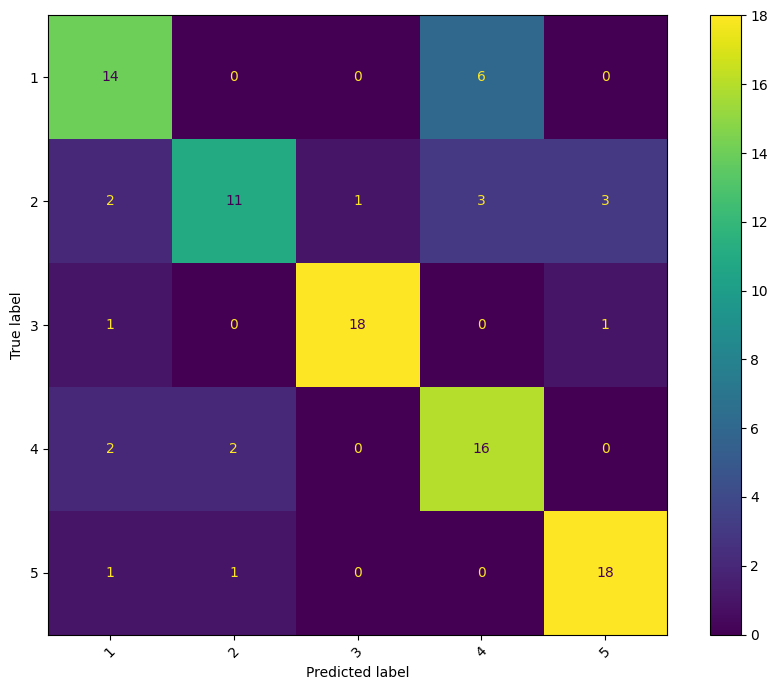

Saved to ./best_model_artifacts
Total script time: 265.6s


In [ ]:
import os, time, random
import numpy as np
import torch
from tqdm import tqdm
from transformers import AutoTokenizer, AutoModel
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from joblib import dump

SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)

TEXT_COL = "bert_input"
LABEL_COL = "label_emotion"
BERT_MODEL = "indobenchmark/indobert-large-p2"
MAX_LEN = 128
BERT_BATCH = 32
TFIDF_MAX_FEATURES = 5000
SVD_DIM = 256
CV_FOLDS = 5
SMOTE_K = 5

t_start_all = time.time()

df = df.copy()
df[TEXT_COL] = df[TEXT_COL].astype(str)
df[LABEL_COL] = df[LABEL_COL].astype(str)

le = LabelEncoder()
y_all = le.fit_transform(df[LABEL_COL])
X_all = df[TEXT_COL].tolist()

X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=SEED, stratify=y_all
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = AutoTokenizer.from_pretrained(BERT_MODEL)
bert_model = AutoModel.from_pretrained(BERT_MODEL, output_hidden_states=True).to(device)
bert_model.eval()

def extract_bert_embeddings(texts, batch_size=BERT_BATCH, max_len=MAX_LEN):
    all_embs = []
    for i in tqdm(range(0, len(texts), batch_size), desc="BERT batches"):
        batch = texts[i:i+batch_size]
        enc = tokenizer(batch, return_tensors="pt", padding=True, truncation=True, max_length=max_len)
        enc = {k: v.to(device) for k,v in enc.items()}
        with torch.no_grad():
            out = bert_model(**enc)
        hs = out.hidden_states
        last4 = torch.stack(hs[-4:], dim=0).mean(0)
        mask = enc["attention_mask"].unsqueeze(-1)
        summed = (last4 * mask).sum(1)
        counts = mask.sum(1).clamp(min=1)
        emb = (summed / counts).cpu().numpy()
        all_embs.append(emb)
    return np.vstack(all_embs)

t0 = time.time()
X_train_bert = extract_bert_embeddings(X_train_text)
X_test_bert  = extract_bert_embeddings(X_test_text)
bert_extract_time = time.time() - t0
print(f"BERT embedding extraction time: {bert_extract_time:.1f}s")
print("BERT embed shapes:", X_train_bert.shape, X_test_bert.shape)

t0 = time.time()
tfidf = TfidfVectorizer(max_features=TFIDF_MAX_FEATURES, ngram_range=(1,2), min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf  = tfidf.transform(X_test_text)

svd = TruncatedSVD(n_components=min(SVD_DIM, X_train_tfidf.shape[1]-1), random_state=SEED)
X_train_tfidf_svd = svd.fit_transform(X_train_tfidf)
X_test_tfidf_svd  = svd.transform(X_test_tfidf)
tfidf_time = time.time() - t0
print(f"TF-IDF + SVD time: {tfidf_time:.1f}s")
print("TF-IDF SVD shapes:", X_train_tfidf_svd.shape, X_test_tfidf_svd.shape)

X_train_comb = np.hstack([X_train_bert, X_train_tfidf_svd])
X_test_comb  = np.hstack([X_test_bert, X_test_tfidf_svd])
print("Combined shapes:", X_train_comb.shape, X_test_comb.shape)

t0 = time.time()
sm = SMOTE(random_state=SEED, k_neighbors=min(SMOTE_K, len(np.unique(y_train))-1))
X_train_res, y_train_res = sm.fit_resample(X_train_comb, y_train)
smote_time = time.time() - t0
print(f"SMOTE time: {smote_time:.1f}s")
print("Before SMOTE class counts:", np.bincount(y_train))
print("After SMOTE class counts:", np.bincount(y_train_res))

candidates = {
    "RandomForest": RandomForestClassifier(n_estimators=500, class_weight="balanced", n_jobs=-1, random_state=SEED),
    "LogisticRegression": LogisticRegression(max_iter=2000, class_weight="balanced", solver="saga", n_jobs=-1, random_state=SEED)
}

skf = StratifiedKFold(n_splits=CV_FOLDS, shuffle=True, random_state=SEED)
best_name, best_score, best_model = None, -1, None
cv_times = {}

for name, clf in candidates.items():
    try:
        t0 = time.time()
        scores = cross_val_score(clf, X_train_res, y_train_res, cv=skf, scoring="f1_macro", n_jobs=-1)
        cv_time = time.time() - t0
        cv_times[name] = cv_time
        mean_score = scores.mean()
        print(f"{name} CV f1_macro: {mean_score:.4f} (std {scores.std():.4f})  time: {cv_time:.1f}s")
        if mean_score > best_score:
            best_score = mean_score
            best_name = name
            best_model = clf
    except Exception as e:
        print(f"{name} skipped: {e}")
        continue

t0 = time.time()
best_model.fit(X_train_res, y_train_res)
train_time = time.time() - t0

t0 = time.time()
y_pred = best_model.predict(X_test_comb)
predict_time = time.time() - t0

acc = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average="macro")

print(f"\nBest model: {best_name}")
print(f"Best CV f1_macro: {best_score:.4f}")
print(f"Train time (best model fit): {train_time:.1f}s")
print(f"Predict time (best model predict on test): {predict_time:.3f}s")
print(f"Test Accuracy: {acc:.4f}")
print(f"Test F1-macro: {f1_macro:.4f}\n")

print(classification_report(y_test, y_pred, target_names=list(le.classes_)))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=list(le.classes_))
fig, ax = plt.subplots(figsize=(9,7))
disp.plot(values_format="d", ax=ax, xticks_rotation=45)
plt.tight_layout()
plt.show()

outdir = "./best_model_artifacts"
os.makedirs(outdir, exist_ok=True)
dump(best_model, os.path.join(outdir, f"best_model_{best_name}.joblib"))
dump(tfidf, os.path.join(outdir, "tfidf_vectorizer.joblib"))
dump(svd, os.path.join(outdir, "tfidf_svd.joblib"))
dump(le, os.path.join(outdir, "label_encoder.joblib"))
tokenizer.save_pretrained(os.path.join(outdir, "tokenizer"))
torch.save(bert_model.state_dict(), os.path.join(outdir, "bert_model_state_dict.pt"))

total_time = time.time() - t_start_all
print("Saved to", outdir)
print(f"Total script time: {total_time:.1f}s")


In [ ]:
# kpop_comments_generator.py
# Generates 500 unique Indonesian K-pop style comments (100 per emotion) and saves as CSV.
# Enhanced version: larger phrase pools, more templates, stronger uniqueness normalization,
# and fallback generation strategies to avoid duplicates.

import random
import pandas as pd
import re

# Reproducible seed (change or set to None for nondeterministic runs)
random.seed(42)

# Output path
OUTPUT_PATH = "./best_model_artifacts.csv"

# Platforms and keywords (expanded)
platforms = ["TikTok", "YouTube", "Instagram", "Twitter", "Facebook"]

keywords = [
    "#newjeans","#heart2hearts","#XODIAC","#TheChase","#Wonyoung","#PIRI",
    "#PrettyPlease","#BTSColdplay","#kpop","#le_sserafim","#Jonghyun","#VoodooDoll",
    "#BTS","#Hearts2Hearts","#MAMA","#SHOUTOUT","#stillwithyou","#lifegoeson",
    "#lisamoney","#Dream","#biteme","#sulli","#NJZ","#kpopers","#Easy",
    "#h2h","#karina","#SmoothLikeButter","#PeekABoo","#Monster","#VENOM",
    "#PinkVenom","#CryForMe","#Cheshire","#DrunkDazed","#Lucifer","#OhMyGod",
    "#Boca","#BloodSweatAndTears","#Noir","#SilentNight","#WayBackHome",
    "#LovesickGirl","#RunBTS","#SHOUTOUT"
]
# make unique
keywords = list(dict.fromkeys(keywords))

idol_names = [
    "Carmen","Minji","Yeon","Ian","Jiwoo","Jungkook","Jin","Jimin","V",
    "Suga","Lisa","Karina","Chaewon","Eunwoo","Taehyung","Taeyeon","Hyun",
    "Mina","Sora","Haeun","Hoshi","Mingyu","Yeri","Nayeon","Chaeyeon"
]

# Expanded emojis
emojis = [
    "😍","😭","😱","🥰","😡","😂","🥲","😮‍💨","🤍","🔥","💖","🤯","🙃",
    "😢","🫠","🤩","😴","😳","🤗","💜","💚","💙","✨","🌸","🎧","🎶","🎤"
]

# Small fragments to combine
starters = [
    "Gila", "Sumpah", "Duh", "Astaga", "Wah", "Beuh", "Ih", "Aduh", "Wow", "Hiks",
    "Ya ampun", "Seriusan", "Beneran", "Eh", "OMG", "Nih", "Tiba-tiba", "Baru sadar",
    "Kaget sih", "Auto", "Langsung", "Please", "Jujur", "Honestly", "Sis", "Bro"
]

middles = [
    "bagian itu", "chorusnya", "vocalnya", "visualnya", "outfitnya", "dance-nya", "rapnya",
    "bridge itu", "intro itu", "endingnya", "liriknya", "melodinya", "produksi ini", "hooknya",
    "beat-nya", "pre-chorus", "backing vocal", "live stage", "MV nya", "scene itu"
]

ends = [
    "bener-bener ngehantam hati", "auto replay", "bikin mewek", "bikin ketawa", "membuat merinding",
    "mungkin jadi lagu favoritku", "bikin mood meledak", "langgeng di playlist", "gabisa move on",
    "membuat antusias", "bikin tepuk tangan", "keren parah", "bikin speechless", "nempel di kepala",
    "bikin ketagihan", "ngulang terus", "jalan di pikiran", "membekas di memori", "bikin mellow"
]

# Subjects, verbs, connectors (expanded)
subjects = [
    "Aku", "Gue", "Gw", "Aku tadi", "Gue barusan", "Kamu liat gak", "Netizen bilang",
    "Fans sini pada", "Ngeliat ini", "Pas nonton", "Lagi denger", "Temenku bilang", "Serius deh",
    "Tadinya ngeremehin", "Baru sadar", "Orang bilang", "Staf bilang", "Sahabatku", "Pacarku"
]

verbs = ["auto", "langsung", "malah", "jadi", "bikin", "membuat", "ngebuat", "membuatku", "membuat kita",
         "ngebuat hati", "ngasih vibes", "ngasih energy"]

connectors = ["tapi", "dan", "jadi", "sampai", "gue", "-", ",", "—", "eh", "loh", "kok", "loh kok"]

# Expanded emotion-specific phrase pools
pools = {
    "happiness": [
        "senyum ga berhenti", "auto joget", "mood booster seharian", "bikin hari cerah", "penghibur sejati",
        "jadi semangat", "happy parah", "bikin kepala ringan", "ngakak saking senangnya", "playlist repeat",
        "iringan suara enak banget", "vibes positif", "energy healing", "bikin hari lebih baik", "cute banget",
        "gemes mulu", "pas banget buat nyetir", "pas buat hangout", "bikin melek pagi", "suaranya soothing",
        "bahagia banget", "senyum manja", "melompat kegirangan", "gembira", "sparkling vibes"
    ],
    "sadness": [
        "mendadak kangen", "membuat air mata menetes", "baper banget", "mood jadi mellow", "ingat masa lalu",
        "berasa kehilangan", "nangis sendiri", "hati jadi sakit", "nguatin rindu", "melankolis", "kayak di adegan sedih",
        "nangis diam-diam", "ingat mantan", "nangis pas malam", "sudut hati sakit", "bawa nostalgia", "bikin termenung",
        "suara menyayat hati", "rasanya kosong", "membekas lama", "resah", "sendu", "melow banget"
    ],
    "fear": [
        "merinding", "jangan nonton sendirian", "suasana creepy", "bulu kuduk berdiri", "vibe horor",
        "deg-degan terus", "tegang pol", "kayak setan lewat", "ga berani lihat lagi", "nonton malem ga berani",
        "efek jumpscare halus", "suara aneh", "visual menyeramkan", "ngeri tapi estetik", "membuat takut",
        "bingung mau nonton lagi", "gelisah", "suasana mencekam", "sunyi mencekam", "takut tapi penasaran"
    ],
    "love": [
        "jatuh cinta berat", "bucin", "heart melt", "visual bikin klepek", "chemistry juara", "my bias",
        "sayang terus", "maunya nikahin layar", "bawa perasaan", "cinta mati", "ngarep bisa ketemu", "senyum meleleh",
        "pengen peluk", "baper manis", "momen sweet", "mencuri perhatian", "ngiklanin merch", "cute overload",
        "love struck", "ngiklanin stan", "cuteness overload"
    ],
    "anger": [
        "kesel maksimal", "emosi meledak", "ngga terima", "sumpah muak", "caps lock emosi", "bikin ribut",
        "drama gak selesai", "ngaco parah", "agensi harus jawab", "fans jadi korban", "stop toxic", "males nonton lagi",
        "ini ga adil", "marah banget", "bikin stress", "ngeluh abis", "nyebelin", "kacau", "bikin heboh"
    ]
}

# Extra adjectives, adverbs, suffixes to increase variants
modifiers = [
    "banget", "parah", "sekali", "beneran", "fix", "no cap", "amat", "gila", "sungguh", "total"
]

punct_variants = ["!", "!!", "...", ".", " 🤯", " ❤️", " 💔", " 😭"]

# Templates to add structural variety
templates = [
    "{opener} {subject} {verb} {object} {emotion_phrase} {idol} {emoji}",
    "{subject} {verb} {object}, {emotion_phrase} {punct}",
    "{opener} {object} {emotion_phrase} {emoji}",
    "{subject} {verb} {emotion_phrase} dan {object} {emoji}",
    "{object} itu {emotion_phrase} {modifier} {punct}",
    "{opener}: {object} -> {emotion_phrase} {idol} {emoji}",
    "{subject} {verb} {object} {emotion_phrase} {emoji} {punct}"
]

# Normalization for uniqueness checks
_NONALPHANUM = re.compile(r"[^0-9a-zA-Z\s]")

def normalize_text(s: str) -> str:
    """Normalize comment text for uniqueness comparison: lowercase, remove punctuation,
    collapse repeated whitespace, and remove short filler tokens."""
    s = s.lower()
    s = _NONALPHANUM.sub(" ", s)  # remove non-alphanum
    s = re.sub(r"\s+", " ", s).strip()
    # Collapse sequences like 'auto replay' vs 'auto replay.'
    return s

# Helper random pick
def rand_item(seq):
    return random.choice(seq)

# Build a small fragment
def make_fragment():
    return f"{rand_item(starters)} {rand_item(middles)} {rand_item(ends)}"

# Generate one comment for given emotion using templates and random choices
def generate_comment_for_emotion(emotion: str) -> str:
    template = rand_item(templates)
    opener = rand_item(starters)
    subject = rand_item(subjects)
    verb = rand_item(verbs)
    obj = rand_item(middles + ["vibe mereka", "liriknya", "chorus itu", "MV itu", "performancenya", "stage" ])
    emotion_phrase = rand_item(pools[emotion])
    idol = rand_item(idol_names) if random.random() < 0.45 else ""
    emoji = rand_item(emojis) if random.random() < 0.6 else ""
    modifier = rand_item(modifiers) if random.random() < 0.35 else ""
    punct = rand_item(punct_variants) if random.random() < 0.6 else "."

    filled = template.format(
        opener=opener,
        subject=subject,
        verb=verb,
        object=obj,
        emotion_phrase=emotion_phrase,
        idol=idol,
        emoji=emoji,
        modifier=modifier,
        punct=punct
    )

    # Minor cleanup whitespace
    filled = re.sub(r"\s+", " ", filled).strip()
    # Capitalize first char
    if filled:
        filled = filled[0].upper() + filled[1:]
    return filled

# Strong uniqueness generation loop
def generate_comments_per_emotion(emotion: str, target=100, max_attempts=20000):
    rows = []
    seen_norm = set()
    attempts = 0
    while len(rows) < target and attempts < max_attempts:
        attempts += 1
        platform = rand_item(platforms)
        keyword = rand_item(keywords)
        comment = generate_comment_for_emotion(emotion)

        # Random chance to append an extra short fragment for variety
        if random.random() < 0.18:
            comment = comment + (" — " + make_fragment())

        norm = normalize_text(comment)

        # If normalized duplicate, try small transformations before discarding
        if norm in seen_norm:
            # try adding an index-style emoji or modifier
            suffix = rand_item(emojis) if random.random() < 0.5 else rand_item(modifiers)
            new_comment = f"{comment} {suffix}"
            new_norm = normalize_text(new_comment)
            if new_norm in seen_norm:
                continue
            comment = new_comment
            norm = new_norm

        # Final safety check for banned tokens
        bad_tokens = ["nigger","fag","bitchlord"]
        if any(bad in comment.lower() for bad in bad_tokens):
            continue

        # Accept
        seen_norm.add(norm)
        rows.append({
            "platform": platform,
            "keyword": keyword,
            "comment": comment,
            "label_text": emotion
        })

    # If we couldn't reach target by normal means, backfill with guaranteed-unique handcrafted lines
    if len(rows) < target:
        needed = target - len(rows)
        for i in range(needed):
            fallback = f"Wah {emotion} unik ke-{i+1} {rand_item(emojis)} {rand_item(modifiers)}"
            # ensure uniqueness
            norm = normalize_text(fallback)
            while norm in seen_norm:
                fallback += "."
                norm = normalize_text(fallback)
            seen_norm.add(norm)
            rows.append({
                "platform": rand_item(platforms),
                "keyword": rand_item(keywords),
                "comment": fallback,
                "label_text": emotion
            })

    return rows

# Build dataset: 100 per emotion
def build_dataset(per_emotion=100):
    all_rows = []
    emotions = list(pools.keys())
    for e in emotions:
        print(f"Generating for emotion: {e}")
        rows = generate_comments_per_emotion(e, target=per_emotion)
        # assign label ids consistently
        label_id_map = {"happiness": 1, "sadness": 2, "fear": 3, "love": 4, "anger": 5}
        for r in rows:
            r["label_id"] = label_id_map[e]
        all_rows.extend(rows)

    random.shuffle(all_rows)
    df = pd.DataFrame(all_rows, columns=["platform","keyword","comment","label_id","label_text"])
    return df

if __name__ == "__main__":
    df = build_dataset(per_emotion=100)
    df.to_csv(OUTPUT_PATH, index=False)
    # display a sample using caas_jupyter_tools if available (this is optional in normal runs)
    try:
        import caas_jupyter_tools as tools
        tools.display_dataframe_to_user("KPop 500 Sample", df.sample(10, random_state=1))
    except Exception:
        print("Saved CSV to:", OUTPUT_PATH)

    print("Done. Total rows:", len(df))


Generating for emotion: happiness
Generating for emotion: sadness
Generating for emotion: fear
Generating for emotion: love
Generating for emotion: anger
Saved CSV to: ./best_model_artifacts.csv
Done. Total rows: 500
